In [1]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 12.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/monthly-milk-production-pounds-p.csv",index_col=0)
df.head()

,Milk
Month,
1962-01,589
1962-02,561
1962-03,640
1962-04,656
1962-05,727


In [5]:
idx = pd.to_datetime( df.index ).to_period("M")
df.index = idx

Plot:

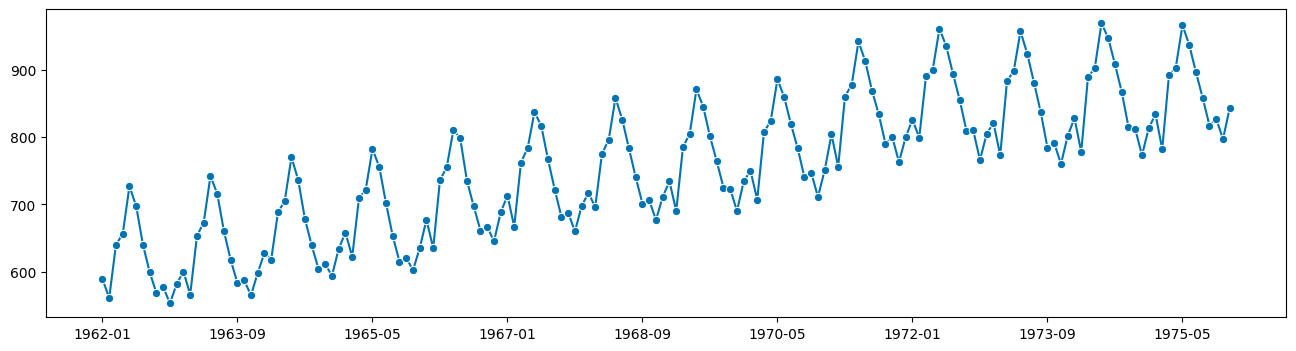

In [6]:
plot_series(df)
plt.show()

In [7]:
y = df['Milk']
y_train, y_test = temporal_train_test_split(y,test_size=12)

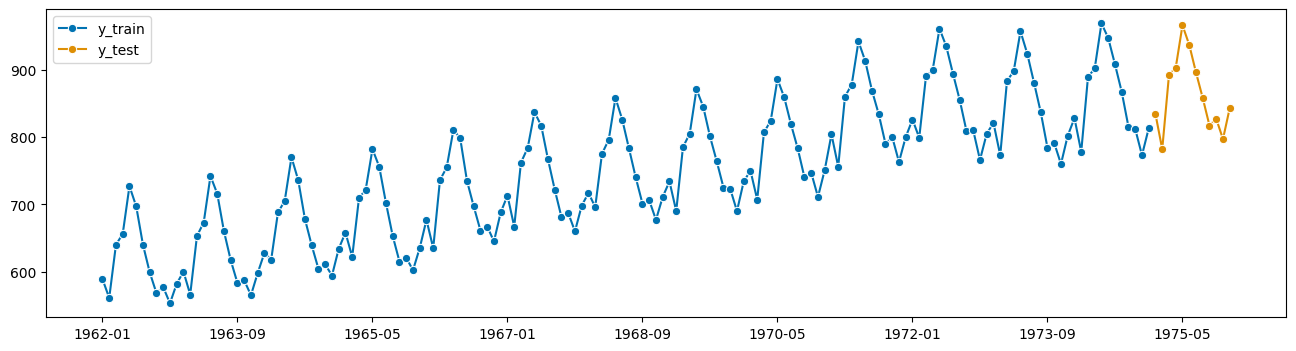

In [8]:
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

Speciying the Forecasting Horizon:

In [9]:
fh = ForecastingHorizon(y_test.index,is_relative=False)
fh

ForecastingHorizon(['1975-01', '1975-02', '1975-03', '1975-04', '1975-05', '1975-06',
             '1975-07', '1975-08', '1975-09', '1975-10', '1975-11', '1975-12'],
            dtype='period[M]', is_relative=False)

Exponential Smoothing (HW)

In [10]:
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

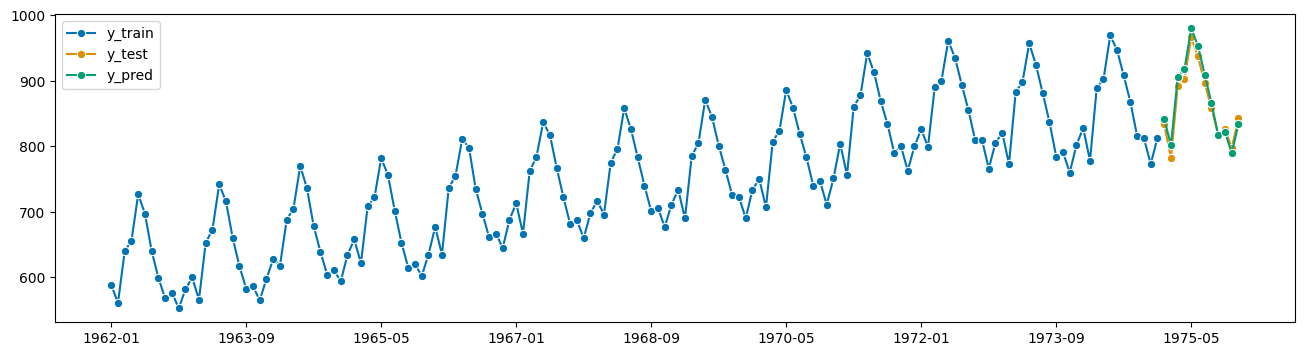

In [11]:
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [12]:
print(mean_squared_error(y_test, y_pred,square_root=True))

11.93580890940159


State Space Models Approach:

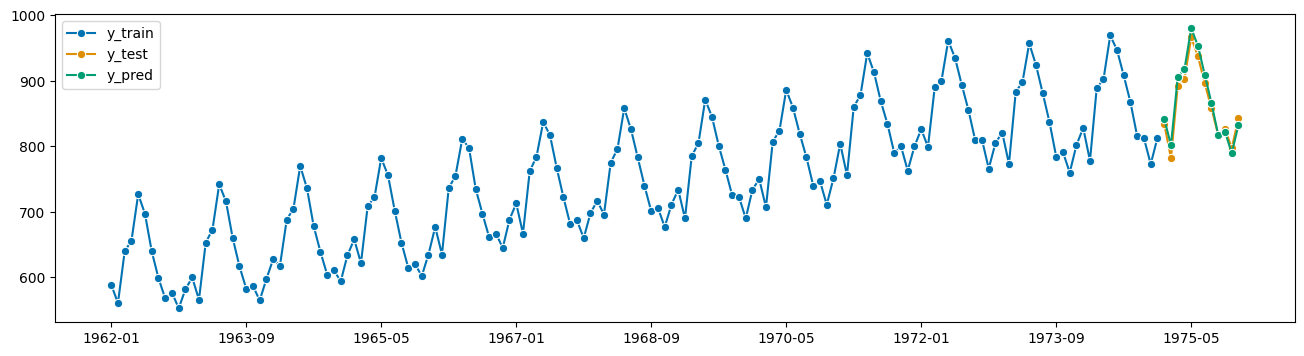

In [13]:
forecaster = AutoETS(auto=True, sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
plt.show()

In [14]:
print(forecaster.summary())

                                 ETS Results                                  
Dep. Variable:                      y   No. Observations:                  156
Model:                       ETS(AAA)   Log Likelihood                -527.851
Date:                Sat, 13 Jan 2024   AIC                           1091.703
Time:                        06:02:26   BIC                           1146.600
Sample:                    01-31-1962   HQIC                          1114.000
                         - 12-31-1974   Scale                           50.879
Covariance Type:               approx                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.6988      0.078      8.984      0.000       0.546       0.851
smoothing_trend      6.988e-05        nan        nan        nan         nan         nan
smoothing_season

In [ ]:
print(mean_squared_error(y_test, y_pred,square_root=True))

11.99798072249666
